In [1]:
import pandas as pd
import string
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
np.set_printoptions(threshold=np.inf)
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_colwidth', 200)


In [2]:
# read csv
data = pd.read_csv('Peer Support_ A Safe Space.csv')

In [3]:
data.shape

(979, 2)

In [4]:
# preview
data.head()

,Field1,Field2
0,NaN,NaN
1,omfg guys I'm actually so happy.. my mood has improved so much since getting on meds,NaN
2,What are your telltale signs you’re going into a (hypo)manic episode?,I noticed today that I kept randomly laughing at stuff that isn’t that funny and that I’ve been singing and dancing more and more as the day progresses. My mood is also really good. I am wondering...
3,How do you cope when you go from manic to depressed overnight?,I have been manic for two weeks and then yesterday I just fell off which isn't too surprising as I always get depressed after I've been manic. I was writing like crazy for two weeks and then yest...
4,Quit my job last week during an episode. Regretting it now.,"School teacher. Love my class, but I have a couple who have ‘the most extreme behaviour I have ever seen in 20 years’ according to my current acting principal."


In [5]:
# check null
data.isnull().sum()

Field1      1
Field2    135
dtype: int64

In [6]:
# drop rows with na
data.dropna(inplace=True)
data.shape

(844, 2)

In [7]:
# change columns names to lower case
data.columns= data.columns.str.lower()

In [8]:
data.head()

,field1,field2
2,What are your telltale signs you’re going into a (hypo)manic episode?,I noticed today that I kept randomly laughing at stuff that isn’t that funny and that I’ve been singing and dancing more and more as the day progresses. My mood is also really good. I am wondering...
3,How do you cope when you go from manic to depressed overnight?,I have been manic for two weeks and then yesterday I just fell off which isn't too surprising as I always get depressed after I've been manic. I was writing like crazy for two weeks and then yest...
4,Quit my job last week during an episode. Regretting it now.,"School teacher. Love my class, but I have a couple who have ‘the most extreme behaviour I have ever seen in 20 years’ according to my current acting principal."
5,Relationships?,"Does anyone feel like they will be a lone forever? I only try to date when feeling up. 34 M this is extremely depressing when I see so many others progressing through life and I am not, just the w..."
6,A lot happening,"I had a girlfriend/ maybe still have a girlfriend, And we went on break shortly after a med change and I think the start of a heavy depression starting. Everything happened at once and because of ..."


In [12]:
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer()

def clean_text(text):
    
	# Punctuation removal
	text = "".join([word.lower() for word in text if word not in string.punctuation])
	text = "".join([word for word in text if not isinstance(word, (int, float))])
    
	# Tokenisation
	# \W matches any non-word character (equivalent to [^a-zA-Z0-9_]). This does not include spaces i.e. \s
	# Add a + just in case there are 2 or more spaces between certain words
	tokens = re.split('\W+', text)
    
	# Apply lemmatisation and stopwords exclusion within the same step.
	text = [wn.lemmatize(word) for word in tokens if word not in stopwords]
	return text


Apply clean text function on Field 1

In [13]:
data['field1_clean'] = data['field1'].apply(lambda x: clean_text(x))
data.head()

,field1,field2,field1_clean
2,What are your telltale signs you’re going into a (hypo)manic episode?,I noticed today that I kept randomly laughing at stuff that isn’t that funny and that I’ve been singing and dancing more and more as the day progresses. My mood is also really good. I am wondering...,"[telltale, sign, going, hypomanic, episode]"
3,How do you cope when you go from manic to depressed overnight?,I have been manic for two weeks and then yesterday I just fell off which isn't too surprising as I always get depressed after I've been manic. I was writing like crazy for two weeks and then yest...,"[cope, go, manic, depressed, overnight]"
4,Quit my job last week during an episode. Regretting it now.,"School teacher. Love my class, but I have a couple who have ‘the most extreme behaviour I have ever seen in 20 years’ according to my current acting principal.","[quit, job, last, week, episode, regretting]"
5,Relationships?,"Does anyone feel like they will be a lone forever? I only try to date when feeling up. 34 M this is extremely depressing when I see so many others progressing through life and I am not, just the w...",[relationship]
6,A lot happening,"I had a girlfriend/ maybe still have a girlfriend, And we went on break shortly after a med change and I think the start of a heavy depression starting. Everything happened at once and because of ...","[lot, happening]"


Apply clean text function on Field 2

In [14]:
data['field2_clean'] = data['field2'].apply(lambda x: clean_text(x))
data.head()

,field1,field2,field1_clean,field2_clean
2,What are your telltale signs you’re going into a (hypo)manic episode?,I noticed today that I kept randomly laughing at stuff that isn’t that funny and that I’ve been singing and dancing more and more as the day progresses. My mood is also really good. I am wondering...,"[telltale, sign, going, hypomanic, episode]","[noticed, today, kept, randomly, laughing, stuff, funny, singing, dancing, day, progress, mood, also, really, good, wondering, going, hypomania, started, past]"
3,How do you cope when you go from manic to depressed overnight?,I have been manic for two weeks and then yesterday I just fell off which isn't too surprising as I always get depressed after I've been manic. I was writing like crazy for two weeks and then yest...,"[cope, go, manic, depressed, overnight]","[manic, two, week, yesterday, fell, isnt, surprising, always, get, depressed, ive, manic, writing, like, crazy, two, week, yesterday, like, nothing, left, slept, 12, hour, last, night, napped, ano..."
4,Quit my job last week during an episode. Regretting it now.,"School teacher. Love my class, but I have a couple who have ‘the most extreme behaviour I have ever seen in 20 years’ according to my current acting principal.","[quit, job, last, week, episode, regretting]","[school, teacher, love, class, couple, extreme, behaviour, ever, seen, 20, year, according, current, acting, principal]"
5,Relationships?,"Does anyone feel like they will be a lone forever? I only try to date when feeling up. 34 M this is extremely depressing when I see so many others progressing through life and I am not, just the w...",[relationship],"[anyone, feel, like, lone, forever, try, date, feeling, 34, extremely, depressing, see, many, others, progressing, life, weird, single, uncle]"
6,A lot happening,"I had a girlfriend/ maybe still have a girlfriend, And we went on break shortly after a med change and I think the start of a heavy depression starting. Everything happened at once and because of ...","[lot, happening]","[girlfriend, maybe, still, girlfriend, went, break, shortly, med, change, think, start, heavy, depression, starting, everything, happened, downpour, negative, emotion, rain, helped, lot, today, su..."


Combine the text in both fields

In [15]:
data['combined_field'] = data[['field1','field2']].agg(' '.join, axis=1)
data.head()

,field1,field2,field1_clean,field2_clean,combined_field
2,What are your telltale signs you’re going into a (hypo)manic episode?,I noticed today that I kept randomly laughing at stuff that isn’t that funny and that I’ve been singing and dancing more and more as the day progresses. My mood is also really good. I am wondering...,"[telltale, sign, going, hypomanic, episode]","[noticed, today, kept, randomly, laughing, stuff, funny, singing, dancing, day, progress, mood, also, really, good, wondering, going, hypomania, started, past]",What are your telltale signs you’re going into a (hypo)manic episode? I noticed today that I kept randomly laughing at stuff that isn’t that funny and that I’ve been singing and dancing more and m...
3,How do you cope when you go from manic to depressed overnight?,I have been manic for two weeks and then yesterday I just fell off which isn't too surprising as I always get depressed after I've been manic. I was writing like crazy for two weeks and then yest...,"[cope, go, manic, depressed, overnight]","[manic, two, week, yesterday, fell, isnt, surprising, always, get, depressed, ive, manic, writing, like, crazy, two, week, yesterday, like, nothing, left, slept, 12, hour, last, night, napped, ano...",How do you cope when you go from manic to depressed overnight? I have been manic for two weeks and then yesterday I just fell off which isn't too surprising as I always get depressed after I've be...
4,Quit my job last week during an episode. Regretting it now.,"School teacher. Love my class, but I have a couple who have ‘the most extreme behaviour I have ever seen in 20 years’ according to my current acting principal.","[quit, job, last, week, episode, regretting]","[school, teacher, love, class, couple, extreme, behaviour, ever, seen, 20, year, according, current, acting, principal]","Quit my job last week during an episode. Regretting it now. School teacher. Love my class, but I have a couple who have ‘the most extreme behaviour I have ever seen in 20 years’ according to my cu..."
5,Relationships?,"Does anyone feel like they will be a lone forever? I only try to date when feeling up. 34 M this is extremely depressing when I see so many others progressing through life and I am not, just the w...",[relationship],"[anyone, feel, like, lone, forever, try, date, feeling, 34, extremely, depressing, see, many, others, progressing, life, weird, single, uncle]",Relationships? Does anyone feel like they will be a lone forever? I only try to date when feeling up. 34 M this is extremely depressing when I see so many others progressing through life and I am ...
6,A lot happening,"I had a girlfriend/ maybe still have a girlfriend, And we went on break shortly after a med change and I think the start of a heavy depression starting. Everything happened at once and because of ...","[lot, happening]","[girlfriend, maybe, still, girlfriend, went, break, shortly, med, change, think, start, heavy, depression, starting, everything, happened, downpour, negative, emotion, rain, helped, lot, today, su...","A lot happening I had a girlfriend/ maybe still have a girlfriend, And we went on break shortly after a med change and I think the start of a heavy depression starting. Everything happened at once..."


Count Vectorizer

In [19]:
# Create an instance of CountVectorizer and pass in the clean_text function as the analyzer parameter
count_vect = CountVectorizer(analyzer=clean_text)

# X_counts stores the vectorized version of the data.
X_counts = count_vect.fit_transform(data['combined_field'])

X_counts_df = pd.DataFrame(X_counts.toarray())
X_counts_df.columns = count_vect.get_feature_names_out()

X_counts_df

,,0,07,1,10,100,1000,10000,100mg,1015,...,youtube,youve,yr,zapped,zero,ziprasidone,zofran,zoloft,zoom,zyprexa
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
841,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
X_counts_df_summary = X_counts_df.sum().sort_values(ascending=False).head(50)
X_counts_df_summary


like          564
feel          459
im            435
bipolar       391
time          306
get           291
know          287
year          266
episode       261
really        231
day           224
work          201
manic         200
one           193
thing         184
job           183
want          179
life          178
even          176
med           173
anyone        168
people        167
think         162
dont          162
going         158
feeling       155
week          155
month         149
make          149
ive           146
diagnosed     144
last          141
go            137
got           126
would         125
much          123
medication    121
also          121
since         119
help          118
take          115
depression    115
mania         114
good          110
still         109
back          107
thought       107
2             105
something     105
lot           104
dtype: int64

<Axes: >

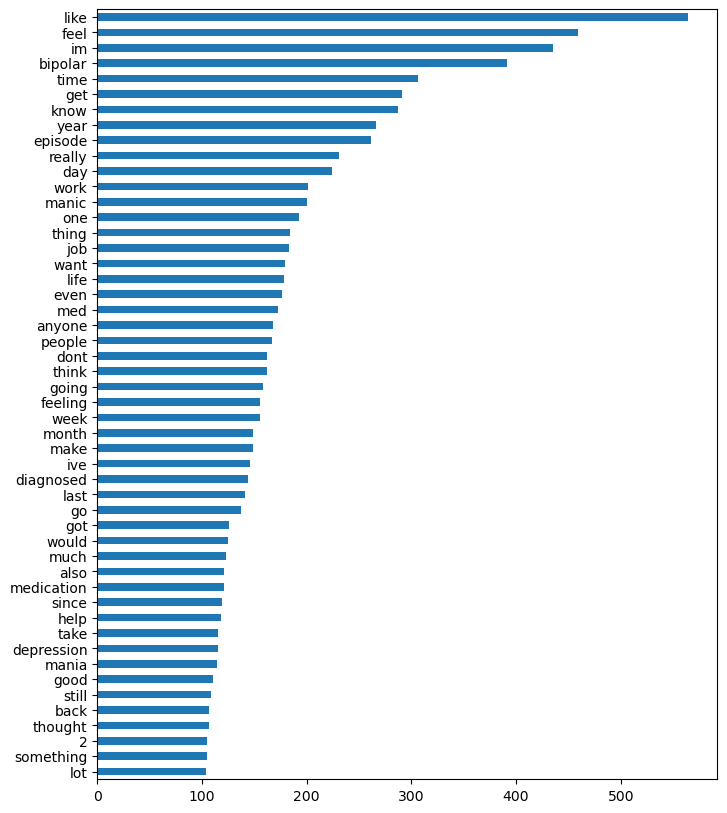

In [32]:
X_counts_df_summary.sort_values(ascending=True).plot(kind='barh', figsize=(8,10), legend=False)

N-Grams Vectorizing

In [33]:
ngram_vect = CountVectorizer(ngram_range=(2,2))
X_counts = ngram_vect.fit_transform(data['combined_field'])
X_counts_df_ngram = pd.DataFrame(X_counts.toarray())
X_counts_df_ngram.columns = ngram_vect.get_feature_names_out()
X_counts_df_ngram


,000 in,000 live,000 word,07 2023,10 000,10 15,10 am,10 day,10 fold,10 haven,...,zoloft and,zoloft event,zoom bipolar,zyprexa 10mg,zyprexa and,zyprexa has,zyprexa is,zyprexa it,zyprexa latuda,zyprexa without
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
841,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
X_counts_df_ngram_summary = X_counts_df_ngram.sum().sort_values(ascending=False).head(50)
X_counts_df_ngram_summary

ve been           175
feel like         157
to be             145
in the            138
want to           132
of my             128
of the            110
in my             108
to get            101
to do              97
and it             97
out of             95
have been          93
don know           90
my life            88
for the            87
do you             86
with my            82
going to           78
to the             75
and have           75
to my              71
it was             70
with bipolar       69
trying to          69
but it             66
how to             65
and my             63
diagnosed with     63
at the             63
for me             63
me to              61
how do             61
anyone else        60
this is            60
have to            57
so much            57
to me              57
able to            54
manic episode      53
know what          53
the last           51
on my              51
bipolar and        50
to go              49
on the    

<Axes: >

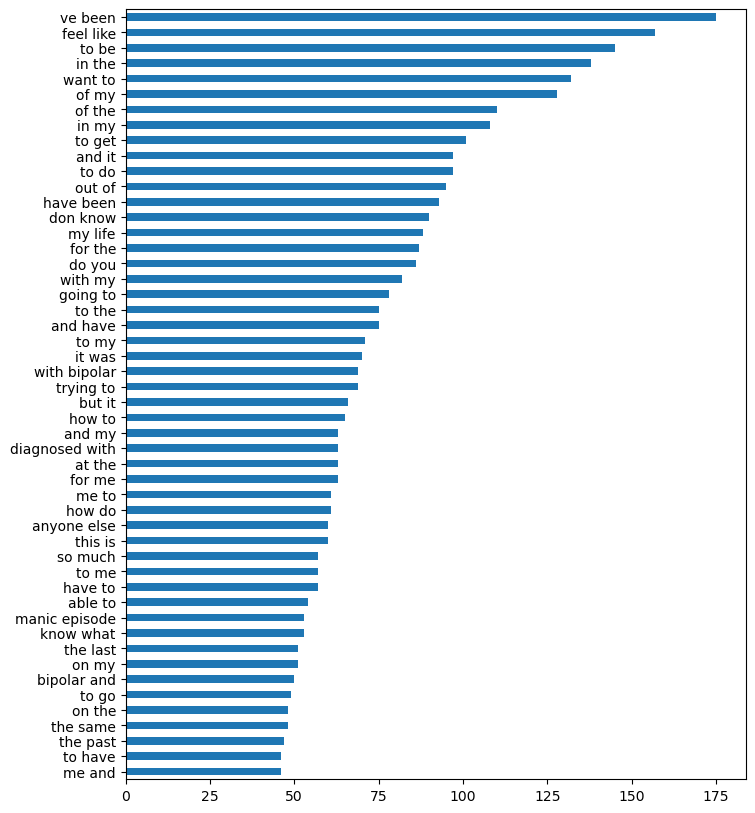

In [36]:
X_counts_df_ngram_summary.sort_values(ascending=True).plot(kind='barh', figsize=(8,10), legend=False)

TF-IDF Vectorizing

In [37]:
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['combined_field'])
X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns = tfidf_vect.get_feature_names_out()
X_tfidf_df



,,0,07,1,10,100,1000,10000,100mg,1015,...,youtube,youve,yr,zapped,zero,ziprasidone,zofran,zoloft,zoom,zyprexa
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.184949,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [39]:
sum_tfidf_df = pd.DataFrame(X_tfidf_df.sum())

sum_tfidf_df = sum_tfidf_df.nlargest(26, 0)
sum_tfidf_df


,0
like,29.533691
im,29.091124
bipolar,28.429055
feel,26.949243
episode,20.862818
get,19.966659
time,19.121068
know,19.112123
year,18.369636
really,16.738735


<Axes: >

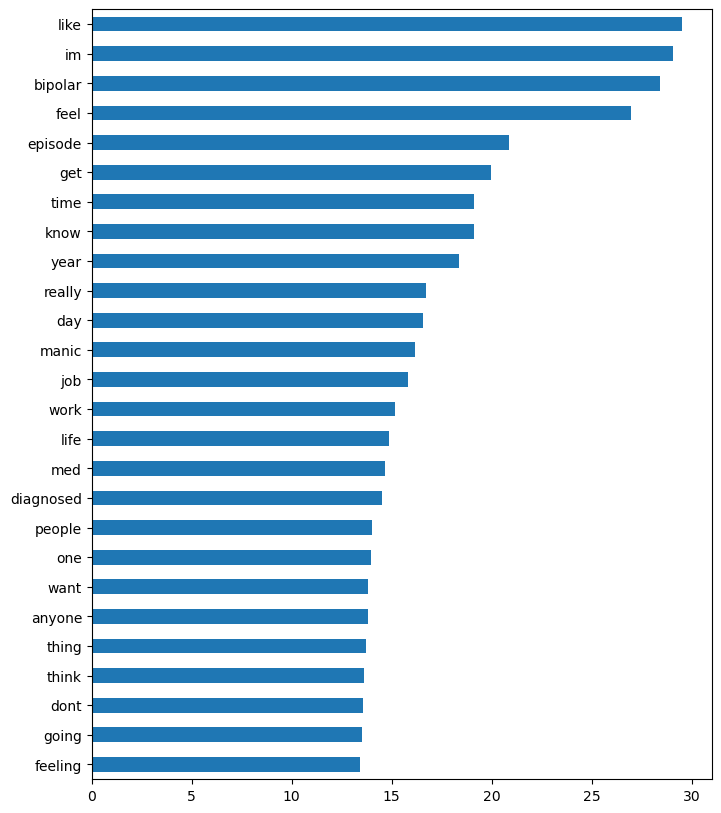

In [40]:
sum_tfidf_df.sort_values(by=0, ascending=True).plot(kind='barh', figsize=(8,10), legend=False)
